# 📊 Product Search Analysis

This notebook contains an analysis of product searches, availability trends, and branch performance based on the provided dataset.

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "diwancustomerbahovercheckprice-18-03-2025.csv"
df = pd.read_csv(file_path)

# Convert SearchDate to datetime
df['SearchDate'] = pd.to_datetime(df['SearchDate'])

# Extract time-based features
df['Hour'] = df['SearchDate'].dt.hour
df['Date'] = df['SearchDate'].dt.date

df.head()


,ID,Barcode,ProductName,Category,SearchDate,BranchID,Branch Name,ItemFoundStatus,Hour,Date
0,1,9780340733509,Power of Now,10232-E Spirituality,2025-02-26 15:58:40.880,2,Zamalek,Found,15,2025-02-26
1,2,NaN,الف ليله و ليله,NaN,2025-02-26 15:58:51.490,2,Zamalek,Not Found,15,2025-02-26
2,3,9781623717247,All That's Left to Y,10140-E Arabic Literature in Translation,2025-02-26 16:02:52.130,2,Zamalek,Found,16,2025-02-26
3,4,9789775864277,The Golden Years of,10213-E Performing Arts,2025-02-26 16:40:36.160,2,Zamalek,Found,16,2025-02-26
4,5,9786009950275,Blue Candle Connecti,10075-Candles,2025-02-26 16:42:04.647,2,Zamalek,Found,16,2025-02-26


## 📊 Availability Analysis
This section analyzes the percentage of found vs. not found items.

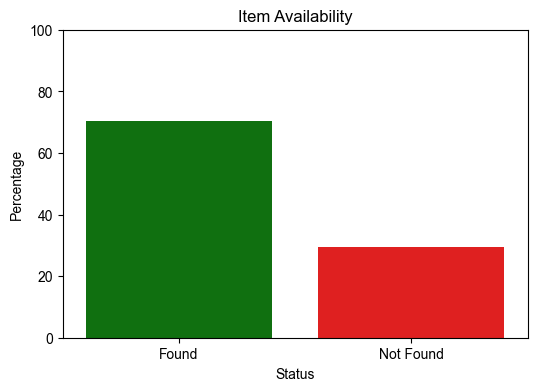

In [21]:
# Calculate percentages
total_searches = len(df)
found_count = df[df['ItemFoundStatus'] == "Found"].shape[0]
not_found_count = df[df['ItemFoundStatus'] == "Not Found"].shape[0]

found_percentage = (found_count / total_searches) * 100
not_found_percentage = (not_found_count / total_searches) * 100

# Create DataFrame for plotting
availability_df = pd.DataFrame({
    "Status": ["Found", "Not Found"],
    "Percentage": [found_percentage, not_found_percentage]
})

# Plot availability (Fix FutureWarning)
plt.figure(figsize=(6, 4))
sns.barplot(
    data=availability_df,
    x="Status",
    y="Percentage",
    hue="Status",  # Assigning hue to fix the warning
    palette={"Found": "green", "Not Found": "red"},
    dodge=False,  # Avoid unnecessary grouping
    legend=False  # Hide unnecessary legend
)

plt.ylabel("Percentage")
plt.title("Item Availability")
plt.ylim(0, 100)
plt.show()


## 🏬 Branch Performance
This section evaluates stock availability across branches.

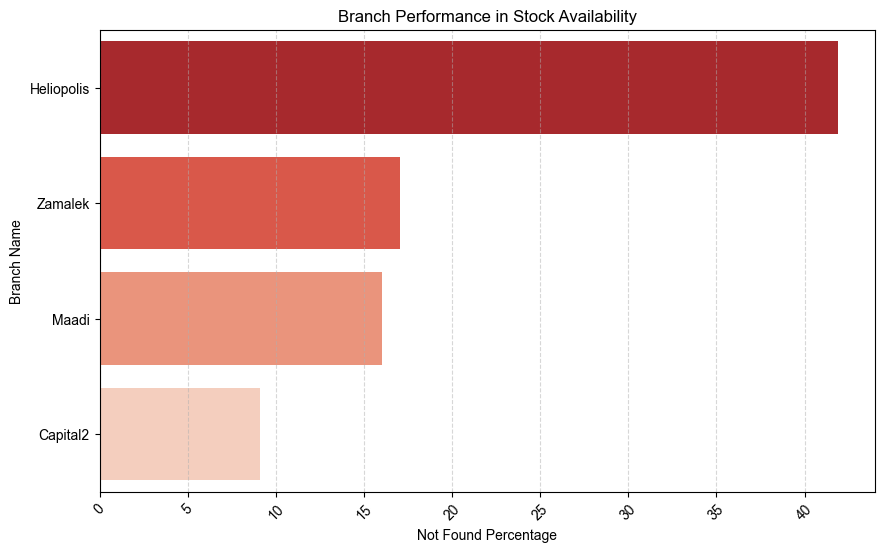

In [22]:
# Group by branch and item found status
branch_performance = df.groupby(['Branch Name', 'ItemFoundStatus']).size().unstack(fill_value=0)

# Ensure 'Not Found' column exists
if 'Not Found' in branch_performance.columns:
    branch_performance['Not Found Percentage'] = (branch_performance['Not Found'] / branch_performance.sum(axis=1)) * 100
else:
    branch_performance['Not Found Percentage'] = 0  # If 'Not Found' data is missing, set 0%

# Sort branches by highest "Not Found Percentage"
branch_performance = branch_performance.sort_values(by='Not Found Percentage', ascending=False)

# Plot branch performance (Fix FutureWarning)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=branch_performance.reset_index(),  
    y="Branch Name",  
    x="Not Found Percentage",  
    hue="Branch Name",  # Assign hue to fix the warning
    palette="Reds_r",
    dodge=False,  # Avoid stacking
    legend=False  # Hide unnecessary legend
)

plt.xlabel("Not Found Percentage")
plt.ylabel("Branch Name")
plt.title("Branch Performance in Stock Availability")
plt.xticks(rotation=45)  # Improve branch name readability
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


## ⏳ Time-Based Analysis
This section analyzes peak hours and search trends over days.

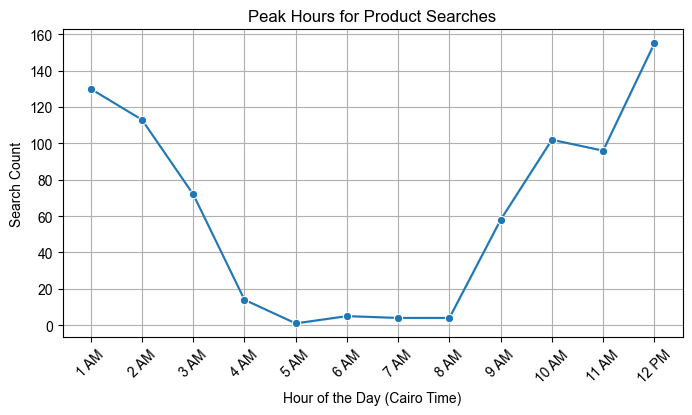

In [23]:
# Convert the 24-hour format to AM/PM format
df['Hour_AMPM'] = df['Hour'].apply(lambda x: f"{(x%12) or 12} {'AM' if x < 12 else 'PM'}")

# Group by formatted hours
peak_hours = df.groupby('Hour_AMPM').size()

# Sort the hours in correct AM/PM order
order = [f"{h} {'AM' if h < 12 else 'PM'}" for h in list(range(1, 12)) + [12] + list(range(1, 12)) + [12]]
peak_hours = peak_hours.reindex(order, fill_value=0)

# Plot peak hours
plt.figure(figsize=(8, 4))
sns.lineplot(x=peak_hours.index, y=peak_hours.values, marker="o")
plt.xlabel("Hour of the Day (Cairo Time)")
plt.ylabel("Search Count")
plt.title("Peak Hours for Product Searches")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


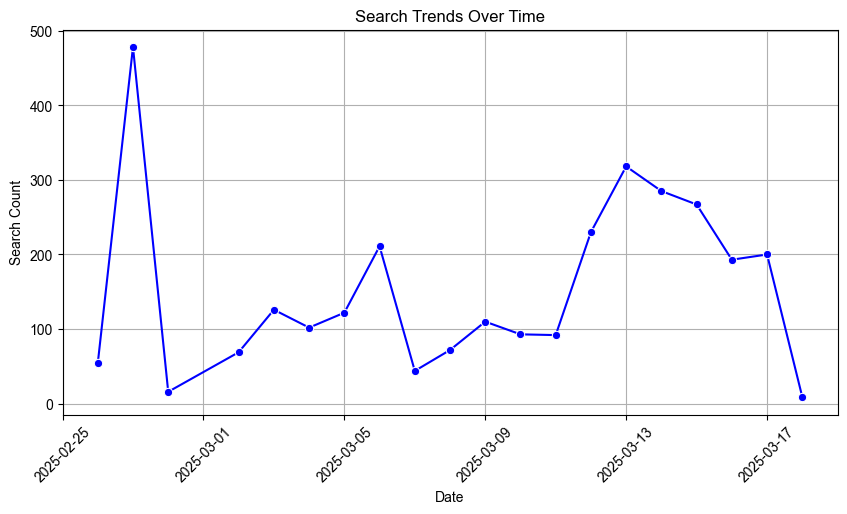

In [24]:

# Search trends over days
search_trends = df.groupby('Date').size()

# Plot search trends
plt.figure(figsize=(10,5))
sns.lineplot(x=search_trends.index, y=search_trends.values, marker="o", color="blue")
plt.xlabel("Date")
plt.ylabel("Search Count")
plt.title("Search Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## ❌ Frequently Searched but Not Found Items

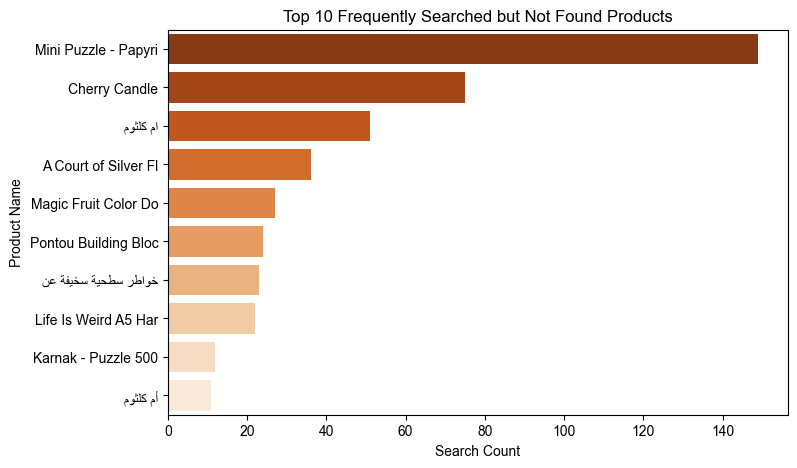

In [25]:
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure Matplotlib supports Arabic text
plt.rcParams['font.sans-serif'] = "Arial"  # Change if needed

# Reshape and fix Arabic text for proper display
not_found_products = df[df['ItemFoundStatus'] == "Not Found"]['ProductName'].value_counts().head(10)

# Convert Arabic text for proper display
not_found_products_display = [get_display(arabic_reshaper.reshape(name)) for name in not_found_products.index]

# Create a DataFrame for seaborn
not_found_df = pd.DataFrame({
    "Product Name": not_found_products_display,
    "Search Count": not_found_products.values
})

# Plot most searched but not found products (Fix FutureWarning)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=not_found_df,
    y="Product Name",
    x="Search Count",
    hue="Product Name",  # Assigning hue to fix the warning
    palette="Oranges_r",
    dodge=False,  # Avoid unnecessary grouping
    legend=False  # Hide unnecessary legend
)

plt.xlabel("Search Count")
plt.ylabel("Product Name")
plt.title("Top 10 Frequently Searched but Not Found Products")
plt.show()



### Conclusion

From our analysis of product search data, we identified key trends and insights:

1. **Peak Search Hour**: The peak search hour is **1:00 PM** when most product searches occur.
2. **Frequently Not Found Products**:  
   The top 5 frequently searched but not found products are:
- Mini Puzzle - Papyri
- Cherry Candle
- ام كلثوم
- A Court of Silver Fl
- Magic Fruit Color Do
3. **Customer Search Behavior**: Analysis of search trends over time reveals seasonal patterns and user preferences.
4. **Category Demand**: Some product categories experience a higher "Not Found" rate, suggesting areas for business improvement.
5. **Recommendations**:
   - Ensure high-demand products are always in stock.
   - Use insights to forecast demand and optimize inventory.

This analysis can help guide strategic decisions in improving product availability and enhancing customer experience.
